In [1]:
%matplotlib inline
import sys
sys.path.insert(1, '../utils/')
import datacube
from utils.deafrica_plotting import rgb, display_map
from utils.deafrica_datahandling import load_ard
from odc.ui import with_ui_cbk

In [2]:
dc = datacube.Datacube(app='Sentinel_2')

In [3]:
lon_range = (-7, -6)
lat_range = (40, 41)
time_range = ("2022-01", "2022-01")

In [4]:
display_map(x=lon_range, y=lat_range)

/notebooks/utils/deafrica_plotting.py:306: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  all_longitude, all_latitude = transform(Proj(crs),


In [5]:
# load data
ds = dc.load(product="s2_l2a",
             measurements=['blue','green','red','nir','swir_1','swir_2'],
             x=lon_range,
             y=lat_range,
             time=time_range,
             resolution=(-10, 10),
             output_crs='EPSG:4258',
            progress_cbk=with_ui_cbk())

print(ds)

<xarray.Dataset>
Dimensions:      (latitude: 1, longitude: 1, time: 32)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01T11:19:20 ... 2022-01-31T11:...
  * latitude     (latitude) float64 45.0
  * longitude    (longitude) float64 -5.0
    spatial_ref  int32 4258
Data variables:
    blue         (time, latitude, longitude) uint16 0 0 0 0 0 0 ... 0 0 0 0 0 0
    green        (time, latitude, longitude) uint16 0 0 0 0 0 0 ... 0 0 0 0 0 0
    red          (time, latitude, longitude) uint16 0 0 0 0 0 0 ... 0 0 0 0 0 0
    nir          (time, latitude, longitude) uint16 0 0 0 0 0 0 ... 0 0 0 0 0 0
    swir_1       (time, latitude, longitude) uint16 0 0 0 0 0 0 ... 0 0 0 0 0 0
    swir_2       (time, latitude, longitude) uint16 0 0 0 0 0 0 ... 0 0 0 0 0 0
Attributes:
    crs:           EPSG:4258
    grid_mapping:  spatial_ref


In [9]:
print(ds.red)

<xarray.DataArray 'red' (time: 32, latitude: 1, longitude: 1)>
array([[[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

...

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]]], dtype=uint16)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01T11:19:20 ... 2022-01-31T11:...
  * latitude     (latitude) float64 45.0
  * longitude    (longitude) float64 -5.0
    spatial_ref  int32 4258
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:4258
    grid_mapping:  spatial_ref


In [10]:
first_timestep = ds.red.isel(time=0)
print(first_timestep)

<xarray.DataArray 'red' (latitude: 1, longitude: 1)>
array([[0]], dtype=uint16)
Coordinates:
    time         datetime64[ns] 2022-01-01T11:19:20
  * latitude     (latitude) float64 45.0
  * longitude    (longitude) float64 -5.0
    spatial_ref  int32 4258
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:4258
    grid_mapping:  spatial_ref


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

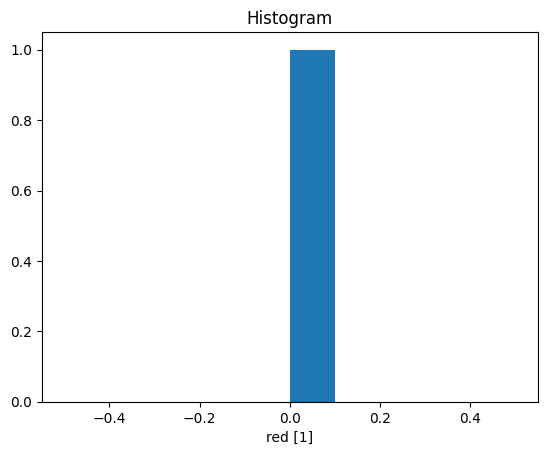

In [11]:
first_timestep.plot()

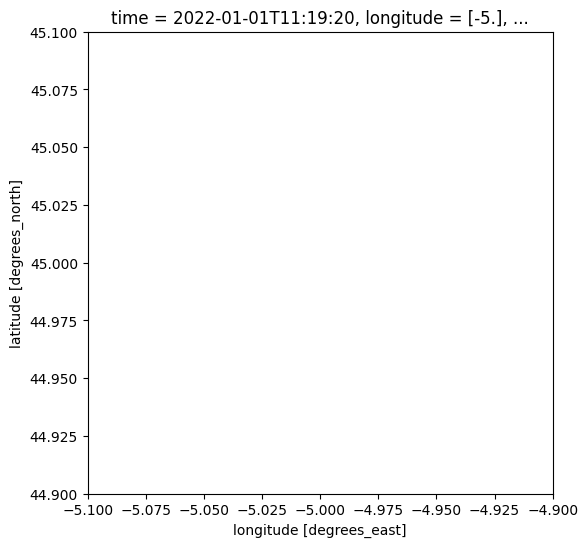

In [18]:
rgb(ds, bands=["red", "green", "blue"], index=0)

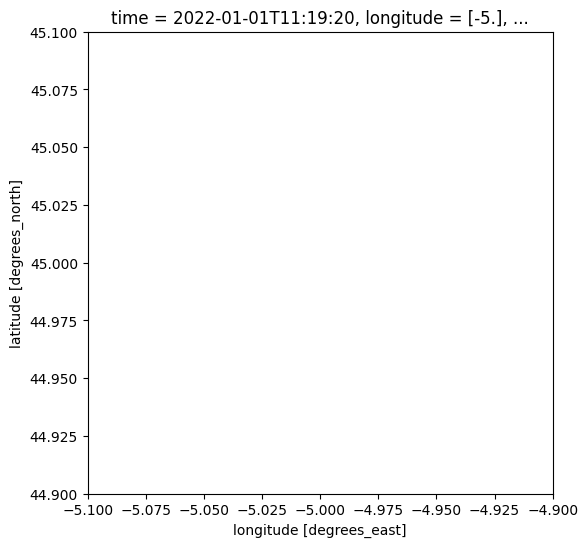

In [19]:
# View a swir_1, nir, green (false colour) image of the first timestep
rgb(ds, bands=['swir_1', 'nir', 'green'], index=0)